In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


In [36]:
df = pd.read_csv("archive (1).zip")

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Drop null values

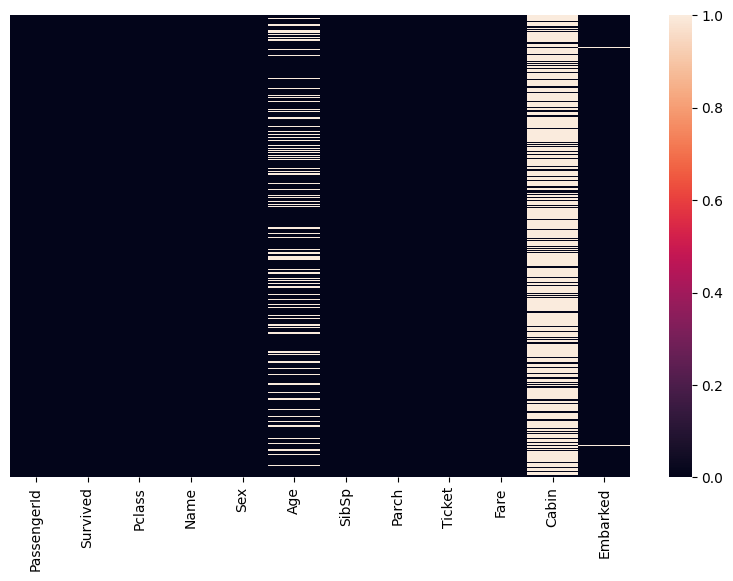

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna() ,yticklabels = False)
plt.show()

In [40]:
round(df.isna().sum()/ df.shape [0] * 100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [41]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [42]:
df['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [43]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

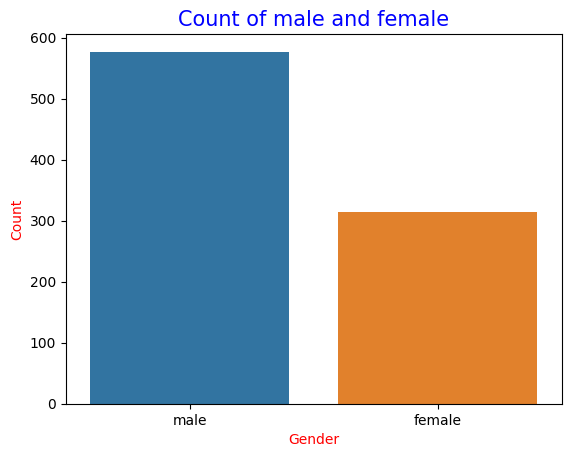

male      577
female    314
Name: Sex, dtype: int64


In [45]:
sns.countplot(x="Sex",data=df)
plt.title("Count of male and female",size=15,color='Blue')
plt.xlabel("Gender",color='red')
plt.ylabel("Count",color='red')
plt.show()
print(df["Sex"].value_counts())

In [46]:
df.drop(columns=['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin'],inplace=True)

In [47]:
df.isnull().sum()

Survived    0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

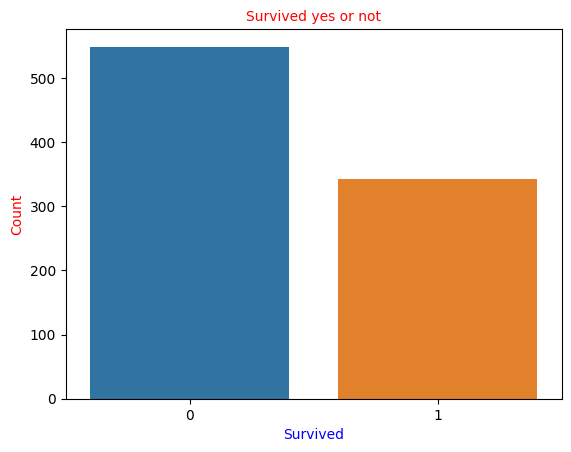

0    549
1    342
Name: Survived, dtype: int64


In [48]:
sns.countplot(x="Survived",data=df)
plt.title("Survived yes or not",size=10,color='red')
plt.xlabel("Survived",color='blue')
plt.ylabel("Count",color='red')
plt.show()
print(df["Survived"].value_counts())

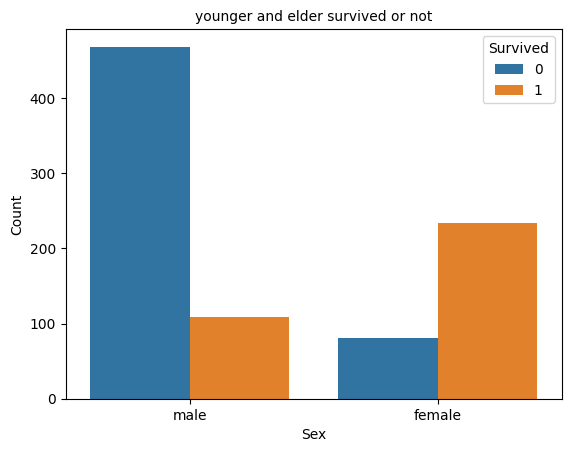

In [49]:
sns.countplot(x="Sex",data=df,hue="Survived")
plt.title("younger and elder survived or not",size = 10 ,color='black')
plt.xlabel("Sex",color='black')
plt.ylabel("Count",color='black')
plt.show()


C:\Users\Jeet Singh\AppData\Local\Temp\ipykernel_15780\801379115.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="Age",data=df.dropna(),shade=True,alpha=1,color="orange")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


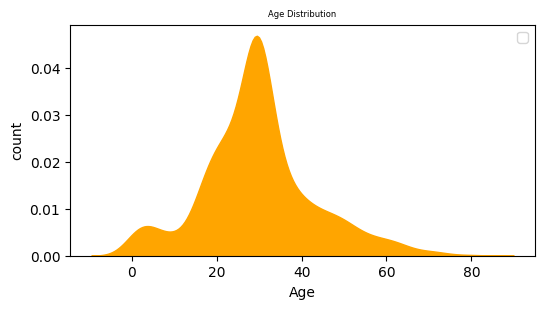

In [50]:
plt.figure(figsize=(6,3))
sns.kdeplot(x="Age",data=df.dropna(),shade=True,alpha=1,color="orange")
plt.title("Age Distribution", size=6 ,color = 'black')
plt.xlabel("Age",color = 'Black')
plt.ylabel("count",color = 'Black')
plt.legend()
plt.show()

C:\Users\Jeet Singh\AppData\Local\Temp\ipykernel_15780\2444294329.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Age' , data=df[df['Survived']==0] .dropna(),shade=True,alpha=1,color="Orange",label="Not Survived")
C:\Users\Jeet Singh\AppData\Local\Temp\ipykernel_15780\2444294329.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Age' , data=df[df["Survived"]==1] .dropna(),shade=True,alpha=0.5,color="blue",label="Survived")


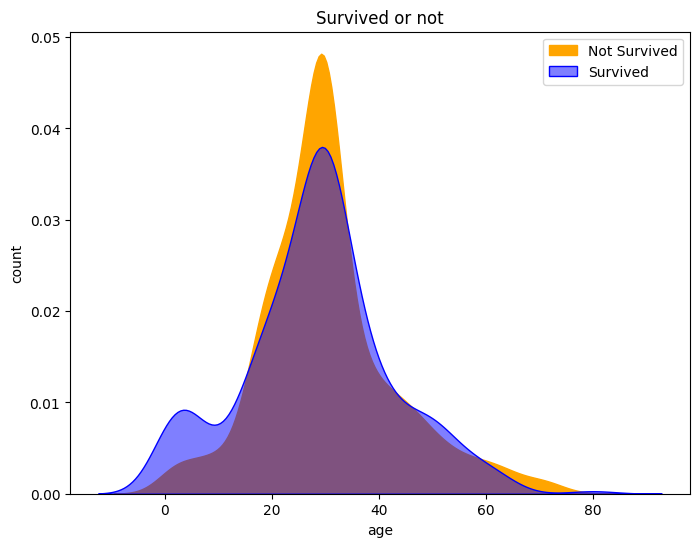

In [51]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='Age' , data=df[df['Survived']==0] .dropna(),shade=True,alpha=1,color="Orange",label="Not Survived")
sns.kdeplot(x='Age' , data=df[df["Survived"]==1] .dropna(),shade=True,alpha=0.5,color="blue",label="Survived")
plt.title("Survived or not",color='black')
plt.xlabel("age",color='black')
plt.ylabel("count",color='black')
plt.legend()
plt.show()

<AxesSubplot: xlabel='Embarked', ylabel='count'>

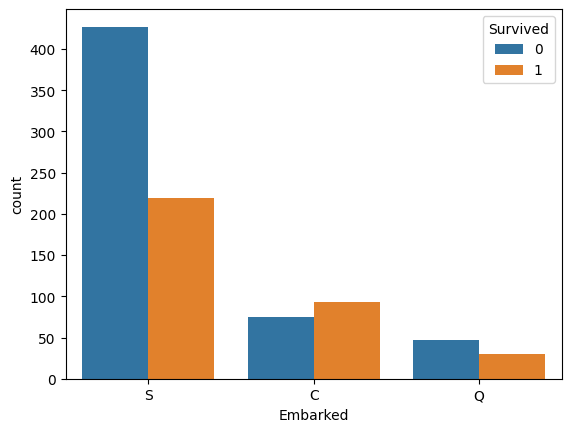

In [52]:
sns.countplot(x="Embarked",data=df,hue="Survived")

In [53]:
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

In [55]:
df.head()

,Survived,Sex,Age,Fare,Embarked
0,0,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,1,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,0,1,35.0,8.0500,2


In [65]:
df['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [66]:
df['Fare'].astype(int)

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int32

# Train test split

In [67]:
y = 'Survived'
x = df.drop("Survived",axis=1)

In [68]:
X = df.drop(labels ='Survived',axis=1)
y = df['Survived']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=21)

In [70]:
X_test.shape

(223, 4)

In [71]:
y_test.shape

(223,)

In [72]:
y_train.shape

(668,)

# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [79]:
reg.intercept_

0.8165444996231372

In [80]:
reg.coef_

array([-0.52826662, -0.00160912,  0.00120243, -0.05445006])

In [81]:
y_pred_train = reg.predict(X_train)

In [85]:
#y_pred_train

In [83]:
y_pred_test = reg.predict(X_test)

In [84]:
y_pred_test

array([0.68516643, 0.1581534 , 0.15761144, 0.1995206 , 0.15481693,
       0.73449585, 0.34276047, 0.13662149, 0.17797735, 0.39025837,
       0.74348399, 0.78821207, 0.16059006, 0.10067257, 0.14991876,
       0.15567252, 0.11455342, 0.26563036, 0.66555987, 0.79563939,
       0.74203215, 0.7138516 , 0.13889194, 0.19535725, 0.74099538,
       0.74810268, 0.25882048, 0.76759229, 0.68632116, 0.69385225,
       0.14530546, 0.78976193, 0.73829246, 0.19535725, 0.15559692,
       0.89257084, 0.67437114, 0.66597464, 0.16103418, 0.15004274,
       0.70000931, 0.17041298, 0.68462186, 0.74348399, 0.12099337,
       0.12197121, 0.24917603, 0.14134307, 0.72238134, 0.14856082,
       0.14533884, 0.14108251, 0.15848407, 0.16228068, 0.15973246,
       0.23879223, 0.13668292, 0.12923723, 0.23416261, 0.25787357,
       0.27137016, 0.14991876, 0.67657627, 0.11825611, 0.24917603,
       0.16627555, 0.78692304, 0.66810635, 1.10306794, 0.66953455,
       0.15305837, 0.18489504, 0.68840951, 0.23066117, 0.15822

In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [96]:
mean_squared_error(y_test, y_pred_test)

0.16677105541766984

In [104]:
#from math import sqrt
#math.sqrt(mean_squared_error(y_train, y_pred_train))

In [103]:
#math.sqrt(mean_squared_error(y_test, y_pred))

In [93]:
r2_score(y_train,y_pred_train)

0.33473882687246415

In [94]:
r2_score(y_test,y_pred_test)

0.3071547356002252

# Ridge and lasso regression

In [106]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [108]:
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)

# stores the weights of each feature
ridge_weight = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train, y_train)
    ridge_weight.append(ridge.coef_)


different alpha values: [   10   100  1000 10000]


In [116]:
y_pred = ridge.predict(X_train)

In [118]:
y_pred_t = ridge.predict(X_test)


In [120]:
r2_score(y_pred,y_train)

-13.650067651499647

In [121]:
r2_score(y_pred_t,y_test)

-14.305623779957832

In [122]:
mean_squared_error(y_test, y_pred_t)

0.21517290847971965

In [109]:
ridge_weight

[array([-0.49406794, -0.00174637,  0.00126627, -0.05434029]),
 array([-0.3124254 , -0.0024682 ,  0.00161961, -0.04971454]),
 array([-0.06712237, -0.00338343,  0.00217858, -0.01992995]),
 array([-0.00761285, -0.00333173,  0.00233077, -0.00273896])]

In [124]:
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train, y_train)
    lasso_weight.append(lasso.coef_)



different alpha values: [0.01, 0.1, 1, 5, 8]


In [126]:
y_pred = lasso.predict(X_train)

In [127]:
y_pred_l = lasso.predict(X_test)

In [128]:
r2_score(y_pred,y_train)

0.0

In [129]:
r2_score(y_pred_l,y_test)

-1.9584574363375827e+31

In [130]:
mean_squared_error(y_test, y_pred_t)

0.21517290847971965

In [132]:
from sklearn.metrics import accuracy_score, auc

In [134]:
#accuracy_score(y_test,y_pred_l)*100

# Decision Tree

In [137]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
humidity_regressor = DecisionTreeRegressor( max_leaf_nodes=10, random_state=0)
humidity_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [140]:
y_pred_de = humidity_regressor.predict(X_train)

In [141]:
y_pred_decision = humidity_regressor.predict(X_test)

In [142]:
r2_score(y_train,y_pred_de)

0.4351266548914501

In [143]:
r2_score(y_test,y_pred_decision)

0.2980503133299721

In [145]:
mean_squared_error(y_test, y_pred_decision)

0.16896253191176647

In [146]:
mean_squared_error(y_train, y_pred_de)

0.1327064490355057

In [149]:
#accuracy_score(y_train,y_pred_de)*100

In [151]:
#accuracy_score(y_test,y_pred_decision)*100